# Pymaceuticals Inc.
---

### Analysis

- Capomulin seems to be comparable to Ramicane in effectiveness;likewise, it is significantly more effective than Infubinol and Ceftamine (based on the box plots of the final tumor volumes)

- The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.95) resulting from the linear regression.

- The results of the study are very consistent, thus reliable, as there is only 1 outlier in the data set for the top drugs, and none for Capomulin
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_study_complete = pd.merge(study_results, mouse_metadata, how="left", on = ["Mouse ID"])

# Display the data table for preview
pharma_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
mice_count = pharma_study_complete['Mouse ID'].nunique()
mice_count

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pharma_study_complete.loc[pharma_study_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = pharma_study_complete.loc[pharma_study_complete["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pharma_study_complete[pharma_study_complete['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_standard_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    "Tumor Volume Mean": regimen_mean,
    "Tumor Volume Median": regimen_median,
    "Tumor Volume Variance": regimen_variance,
    "Tumor Volume Standard Deviation": regimen_standard_dev,
    "Tumor Volume Standard Error": regimen_sem,
})
summary_stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# Of Observed Mouse Timepoints')

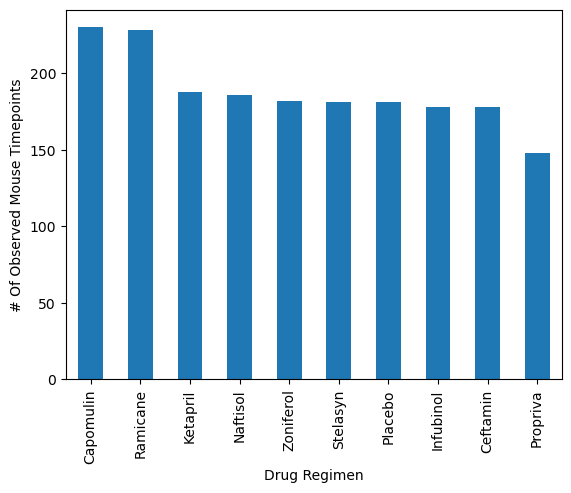

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.,
mice_count = clean_df["Drug Regimen"].value_counts()
first_bar_chart = mice_count.plot.bar(color='tab:blue')

#Axis display
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")

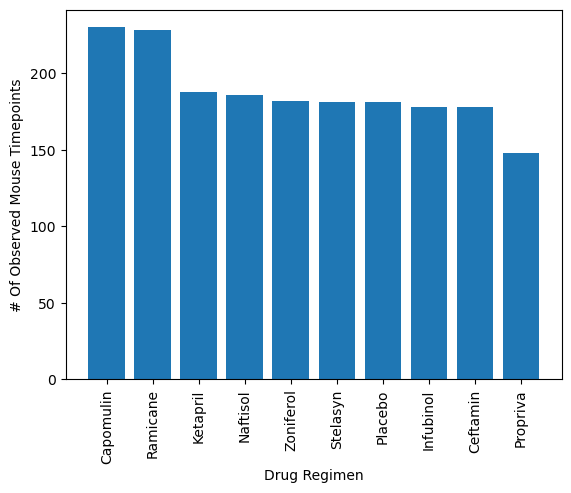

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Creating a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')

# Setting the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

Sex
Male      125
Female    123
Name: count, dtype: int64
Total unique mice: 248


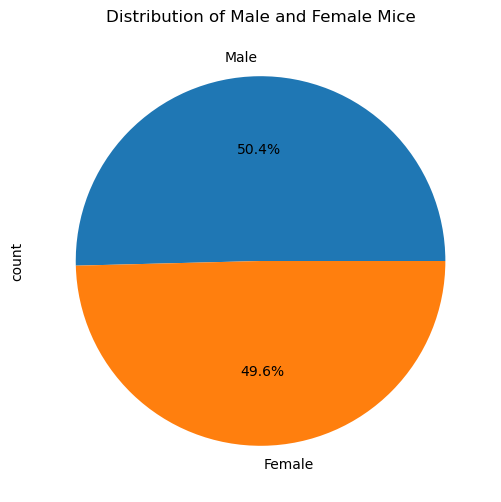

Male mice: 125 (50.4%)
Female mice: 123 (49.6%)


In [16]:
# Get the unique mice data based on 'Mouse ID' to ensure each mouse is counted only once
unique_mice = clean_df.drop_duplicates(subset=['Mouse ID'])

# Count the unique values for each gender
sex_data = unique_mice["Sex"].value_counts()

# Display the counts
print(sex_data)

# Verify the total number of unique mice
total_mice = len(unique_mice)
print(f"Total unique mice: {total_mice}")

# Create a pie chart with the percentages of male and female mice
plt.figure(figsize=(8, 6))
sex_data.plot.pie(autopct="%1.1f%%")
plt.title('Distribution of Male and Female Mice')
plt.ylabel('count') 
plt.show()

# Print the actual counts and percentages for verification
print(f"Male mice: {sex_data['Male']} ({sex_data['Male']/total_mice*100:.1f}%)")
print(f"Female mice: {sex_data['Female']} ({sex_data['Female']/total_mice*100:.1f}%)")

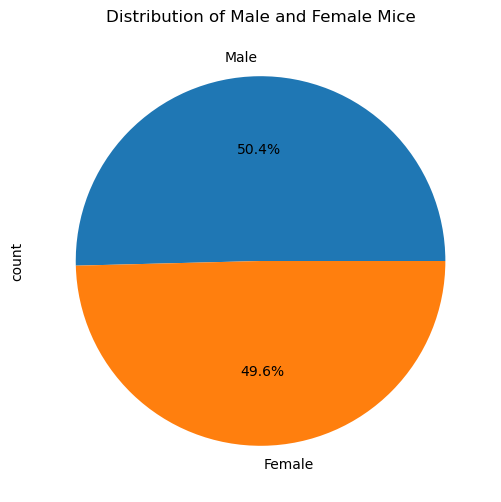

In [17]:
# Get the unique mice data based on 'Mouse ID' to ensure each mouse is counted only once
unique_mice = clean_df.drop_duplicates(subset=['Mouse ID'])

# Count the unique values for each gender
sex_data = unique_mice["Sex"].value_counts()

# Data for pie chart
labels = sex_data.index
sizes = sex_data.values


# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Male and Female Mice')
plt.ylabel('count') 

# Display the chart
plt.show()


## Quartiles, Outliers and Boxplots using 'for loop'

In [18]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
mouse_timepoint = pharma_study_complete.groupby(["Mouse ID"]).max()
mouse_timepoint_reset = mouse_timepoint.reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_data_frame = mouse_timepoint_reset[['Mouse ID','Timepoint']].\
    merge(pharma_study_complete,on=['Mouse ID','Timepoint'],how="left")


In [19]:
# The four treatment groups are put in a list
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# An empty list to fill with tumor volume data
tumor_vol_data = []

In [20]:
# For loop to display the IQR and outliers for each treatment group
for treatment in treatment_groups:
    regimen_data = timepoint_merged_data_frame.loc[timepoint_merged_data_frame['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(regimen_data)
    
    # Calculate quartiles and IQR
    quartiles = regimen_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using the IQR
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


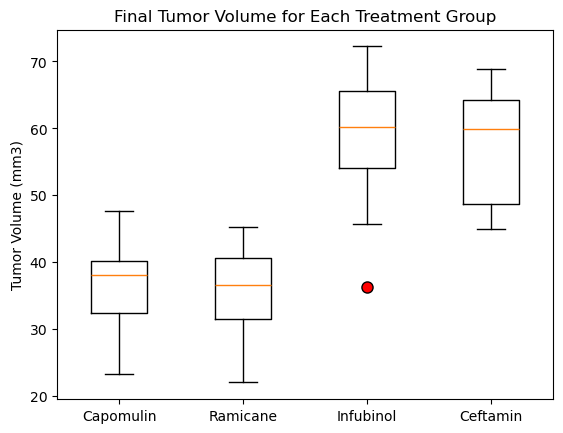

In [21]:
# Generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatment_groups, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'r'})
ax.set_title('Final Tumor Volume for Each Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Quartiles, Outliers and Boxplots by creating a function

In [22]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
mouse_timepoint = pharma_study_complete.groupby(["Mouse ID"]).max()
mouse_timepoint_reset = mouse_timepoint.reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_data_frame = mouse_timepoint_reset[['Mouse ID','Timepoint']].\
    merge(pharma_study_complete,on=['Mouse ID','Timepoint'],how="left")

In [23]:
# Putting treatments into a list for for loop (and later for plot labels)
def outliers(regimen):
    regimen_data = timepoint_merged_data_frame.loc[timepoint_merged_data_frame["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
ceft = outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


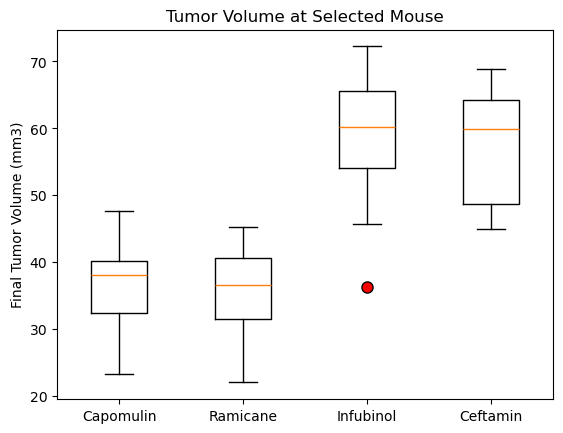

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_point = dict(markerfacecolor = "red", markersize=8)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

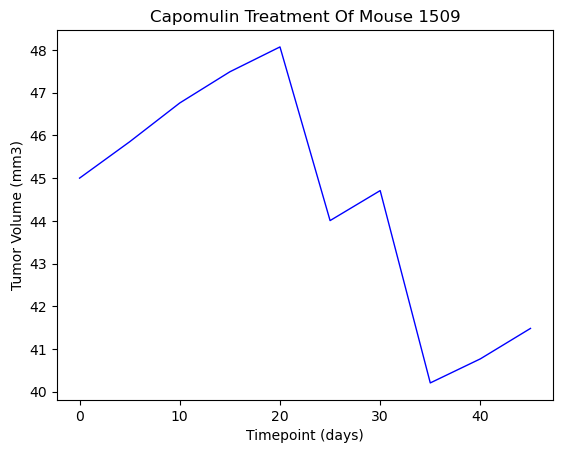

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Creating variables
capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

forline_df = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "l509", :]
forline_df.head()

#Assigning X and Y axis
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

#Plotting information 
fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatment Of Mouse 1509')
plt.plot(x_axis, tumsiz, linewidth= 1, color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [26]:
#Mouse ID is an object and needs to be converted to int
clean_df["Mouse ID"].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

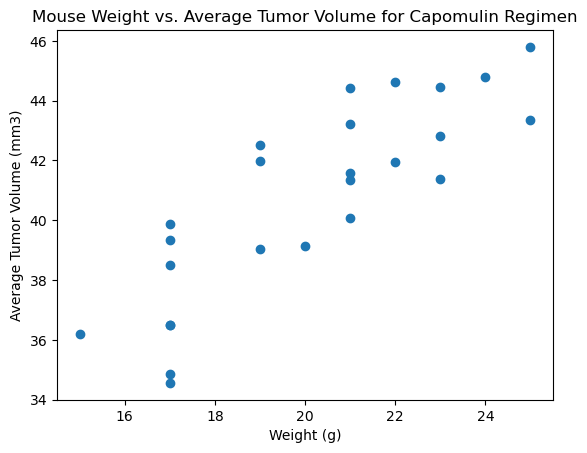

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Creating variables
fig1, ax1 = plt.subplots()

# Calculate the average tumor volume for each mouse
avg_cap_tvol = capomulin_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge average tumor volume with the original DataFrame to get the corresponding weights
capomulin_weight_tumor = pd.merge(avg_cap_tvol, capomulin_mouse[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

#Plotting information 
marker_size= 10
plt.scatter(capomulin_weight_tumor['Weight (g)'], capomulin_weight_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


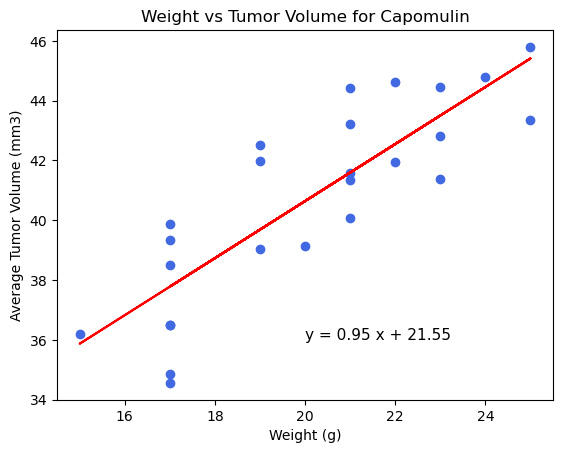

In [28]:
# Calculating the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = st.pearsonr(capomulin_weight_tumor['Weight (g)'],capomulin_weight_tumor['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")

#Perform Linear Regression
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capomulin_weight_tumor["Weight (g)"],capomulin_weight_tumor["Tumor Volume (mm3)"])

#Calculate Regression Values
regress_values=capomulin_weight_tumor["Weight (g)"]* slope + intercept

#Create the line equation text
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#Plot the Data
plt.scatter(capomulin_weight_tumor["Weight (g)"],capomulin_weight_tumor["Tumor Volume (mm3)"],color='royalblue')
plt.plot(capomulin_weight_tumor["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()